In [104]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
# Load dataset
df = pd.read_csv("/Users/andreapena/Downloads/Loan_Default.csv") 

#Check out dataset
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [106]:
# Feature to look at the amount of rows and columns.
df.shape

(148670, 34)

In [107]:
# Check data indices.
df.index

RangeIndex(start=0, stop=148670, step=1)

In [108]:
# Check column names.
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [184]:
# Feature Descriptions table
data = {
    "Name": [
        'ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthines', 'open_credit', 
        'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 
        'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income',
        'credit_type', 'Credit Score', 'co-applicant_credit_type', 'age', 'submission of application', 'LTV', 'Region', 'Security_Type', 
        'Status', 'dtir1'
    ],
    "Description": [
        "client loan application id",
        "year of loan application",
        "indicates whether the loan is conforming (cf) or non-conforming (ncf)",
        "gender of the applicant (male, female, joint, sex not available)",
        "indicates whether the loan was approved in advance (pre, nopre)",
        "type of loan (type1, type2, type3)",
        "purpose of the loan (p1, p2, p3, p4)",
        "credit worthiness (l1, l2)", 
        "indicates whether the applicant has any open credit accounts (opc, nopc)", 
        "indicates whether the loan is for business/commercial purposes (ob/c - business/commercial, nob/c - personal)",
        "amount of money being borrowed", 
        "interest rate charged on the loan", 
        "difference between the interest rate on the loan and a benchmark interest rate",
        "initial charges associated with securing the loan", 
        "duration of the loan in months", 
        "indicates whether the loan allows for negative ammortization (neg_amm, not_neg)", 
        "indicates whether the loan has an interest-only payment option (int_only, not_int)", 
        "indicates if a lump sum payment is required at the end of the loan term (lpsm, not_lpsm)", 
        "value of the property being financed", 
        "type of construction (sb - site built, mh - manufactured home)",
        "occupancy type (pr - primary residence, sr- secondary residence, ir - investment property)", 
        "specifies the type of collateral securing the loan (home, land)", 
        "number of units in the property being financed (1U, 2U, 3U, 4U)", 
        "applicant's annual income",
        "applicant's type of credit (CIB - credit information bureau , CRIF - CIRF credit information bureau, EXP - experian , EQUI - equifax)", 
        "applicant's credit score", 
        "co-applicant's type of credit (CIB - credit information bureau EXP - experian)", 
        "the age of the applicant.",
        "indicates how the application was submitted (to_inst - to institution, not_inst - not to institution)",
        "loan-to-value ratio calculated as the loan amount divided by the property value",
        "geographic region where the property is located (North, south, central, North-East)",
        "type of security or collateral backing the loan (direct, indirect)",
        "indicates whether the loan has been defaulted (1) or not (0)",
        "debt-to-income ratio"
    ]
}

df_reference = pd.DataFrame(data)
display(df_reference)

,Name,Description
0,ID,client loan application id
1,year,year of loan application
2,loan_limit,indicates whether the loan is conforming (cf) ...
3,Gender,"gender of the applicant (male, female, joint, ..."
4,approv_in_adv,indicates whether the loan was approved in adv...
5,loan_type,"type of loan (type1, type2, type3)"
6,loan_purpose,"purpose of the loan (p1, p2, p3, p4)"
7,Credit_Worthines,"credit worthiness (l1, l2)"
8,open_credit,indicates whether the applicant has any open c...
9,business_or_commercial,indicates whether the loan is for business/com...


In [109]:
#Check the types of feature columns, count and dtype.
df.info

<bound method DataFrame.info of             ID  year loan_limit             Gender approv_in_adv loan_type  \
0        24890  2019         cf  Sex Not Available         nopre     type1   
1        24891  2019         cf               Male         nopre     type2   
2        24892  2019         cf               Male           pre     type1   
3        24893  2019         cf               Male         nopre     type1   
4        24894  2019         cf              Joint           pre     type1   
...        ...   ...        ...                ...           ...       ...   
148665  173555  2019         cf  Sex Not Available         nopre     type1   
148666  173556  2019         cf               Male         nopre     type1   
148667  173557  2019         cf               Male         nopre     type1   
148668  173558  2019         cf             Female         nopre     type1   
148669  173559  2019         cf             Female         nopre     type1   

       loan_purpose Credit_Wort

In [110]:
df.describe(include='all')

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
count,148670.000000,148670.0,145326,148670,147762,148670,148536,148670,148670,148670,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,148549,148670,148670,1.335720e+05,148670,148670,148670,148670,139520.000000,148670,148670.000000,148670,148470,148470,133572.000000,148670,148670,148670.000000,124549.000000
unique,NaN,NaN,2,4,2,3,4,2,2,2,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,2,3,2,4,NaN,4,NaN,2,7,2,NaN,4,2,NaN,NaN
top,NaN,NaN,cf,Male,nopre,type1,p3,l1,nopc,nob/c,NaN,NaN,NaN,NaN,NaN,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,NaN,CIB,NaN,CIB,45-54,to_inst,NaN,North,direct,NaN,NaN
freq,NaN,NaN,135348,42346,124621,113173,55934,142344,148114,127908,NaN,NaN,NaN,NaN,NaN,133420,141560,145286,NaN,148637,138201,148637,146480,NaN,48152,NaN,74392,34720,95814,NaN,74722,148637,NaN,NaN
mean,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,NaN,NaN,NaN,4.978935e+05,NaN,NaN,NaN,NaN,6957.338876,NaN,699.789103,NaN,NaN,NaN,72.746457,NaN,NaN,0.246445,37.732932
std,42917.476598,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,NaN,NaN,NaN,3.599353e+05,NaN,NaN,NaN,NaN,6496.586382,NaN,115.875857,NaN,NaN,NaN,39.967603,NaN,NaN,0.430942,10.545435
min,24890.000000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,NaN,NaN,NaN,8.000000e+03,NaN,NaN,NaN,NaN,0.000000,NaN,500.000000,NaN,NaN,NaN,0.967478,NaN,NaN,0.000000,5.000000
25%,62057.250000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.965000e+05,3.625000,0.076000,581.490000,360.000000,NaN,NaN,NaN,2.680000e+05,NaN,NaN,NaN,NaN,3720.000000,NaN,599.000000,NaN,NaN,NaN,60.474860,NaN,NaN,0.000000,31.000000
50%,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,NaN,NaN,NaN,4.180000e+05,NaN,NaN,NaN,NaN,5760.000000,NaN,699.000000,NaN,NaN,NaN,75.135870,NaN,NaN,0.000000,39.000000
75%,136391.750000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,NaN,NaN,NaN,6.280000e+05,NaN,NaN,NaN,NaN,8520.000000,NaN,800.000000,NaN,NaN,NaN,86.184211,NaN,NaN,0.000000,45.000000


In [111]:
# Check null values
df.isnull().sum().sort_values(ascending=False)

Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
LTV                          15098
property_value               15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
submission_of_application      200
age                            200
loan_purpose                   134
Neg_ammortization              121
term                            41
Region                           0
total_units                      0
Security_Type                    0
Status                           0
co-applicant_credit_type         0
Credit_Score                     0
credit_type                      0
ID                               0
Secured_by                       0
occupancy_type                   0
construction_type                0
year                             0
interest_only                    0
loan_amount                      0
business_or_commerci

In [112]:
# Check percentage of null values
df.isnull().sum().sort_values(ascending=False) / len(df)

Upfront_charges              0.266644
Interest_rate_spread         0.246445
rate_of_interest             0.245100
dtir1                        0.162245
LTV                          0.101554
property_value               0.101554
income                       0.061546
loan_limit                   0.022493
approv_in_adv                0.006107
submission_of_application    0.001345
age                          0.001345
loan_purpose                 0.000901
Neg_ammortization            0.000814
term                         0.000276
Region                       0.000000
total_units                  0.000000
Security_Type                0.000000
Status                       0.000000
co-applicant_credit_type     0.000000
Credit_Score                 0.000000
credit_type                  0.000000
ID                           0.000000
Secured_by                   0.000000
occupancy_type               0.000000
construction_type            0.000000
year                         0.000000
interest_onl

In [113]:
# Check duplicate values
df[df.duplicated()]

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1


In [114]:
# For all categorical columns
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
     print(df[col].value_counts())

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64
approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64
loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64
Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64
open_credit
nopc    148114
opc        556
Name: count, dtype: int64
business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64
Neg_ammortization
not_neg    133420
neg_amm     15129
Name: count, dtype: int64
interest_only
not_int     141560
int_only      7110
Name: count, dtype: int64
lump_sum_payment
not_lpsm    145286
lpsm          3384
Name: count, dtype: int64
construction_type
sb    148637
mh        33
Name: count, dtype: int64
occupancy_type
pr    13

NOTES:

Class Imbalance: Loan_limit, approv_in_adv, Neg_ammortization, Region, Security_type, Secured_by Business or commercial, and Security_Type show that some categories dominate the data.

Data Quality Issues: Gender includes "Sex Not Available", "Indriect" in Security_Type might be a typo.

In [115]:
# Fill numerical NaNs with median
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

In [116]:
# Fill categorical NaNs with the mode 
categorical_columns = df.select_dtypes(exclude=['number']).columns
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

/var/folders/6r/mcwbbx4n1z9gks_6whyvn5tr0000gn/T/ipykernel_6001/3263767415.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [117]:
# Check if there are any missing values 
df.isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [118]:
# Check summary statistics
pd.set_option('display.max_columns', None)
print(df.describe())

                  ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     148670.000000   
mean    99224.500000    2019.0  3.311177e+05          4.031879   
std     42917.476598       0.0  1.839093e+05          0.488348   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.750000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.250000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         148670.000000    148670.000000  148670.000000    1.486700e+05   
mean               0.429024      3057.397919     335.143438    4.897800e+05   
std                0.445907      2797.972965      58.402488    3.420221e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%       

NOTES:

High Outliers(Max far from 75%): income, LTV, Interest_rate_spread, Upfront_charges, rate_of_interest

Low Outliers(Min far from 25%): dtir1, LTV, property_value, interest_rate_spread, term

High Variance: loan_amount, income, property_value

In [148]:
# Fix typos 
df.replace({'Indriect': 'Indirect','Sex Not Available': pd.NA}, inplace=True)

In [146]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [158]:
# Map loan_type codes to labels
loan_type_map = {
    'type1': 'Conventional',
    'type2': 'Gov-Backed',
    'type3': 'Non-Conventional'
    }
df['loan_type_label'] = df['loan_type'].map(loan_type_map)

In [156]:
# Map loan_purpose codes to labels
loan_purpose_map = {
        'p1': 'Home Purchase',
        'p2': 'Home Improvement',
        'p3': 'Refinancing',
        'p4': 'Investment Property'
        }
df['loan_purpose_label'] = df['loan_purpose'].map(loan_purpose_map)

In [162]:
# Capitalize consistent region values
if 'region' in df.columns:
    df['region'] = df['region'].str.lower().str.capitalize()

In [164]:
# Create default status label
df['default_status'] = df['status'].map({1: 'Defaulted', 0: 'Not Defaulted'})

In [166]:
# Create LTV risk category
if 'ltv' in df.columns:
    df['ltv_category'] = pd.cut(
        df['ltv'],
        bins=[0, 60, 80, 100, float('inf')],
        labels=['Low LTV', 'Moderate LTV', 'High LTV', 'Very High LTV'],
        include_lowest=True)

In [170]:
# Map credit worthiness codes to labels
df['credit_worthiness'] = df['credit_worthiness'].map({
    'l1': 'On-Time Payment',
    'l2': '30+ Days Late Payment'}).fillna('Unknown Payment Status')

In [172]:
# Create DTIR (Debt-to-Income Ratio) flag
if 'dtir1' in df.columns:
    df['high_dtir_flag'] = df['dtir1'].apply(lambda x: 'High DTIR' if x > 0.4 else 'Normal DTIR')

In [174]:
# Save for Tableau
df.to_csv('/Users/andreapena/Downloads/Loan_Default.csv', index=False)

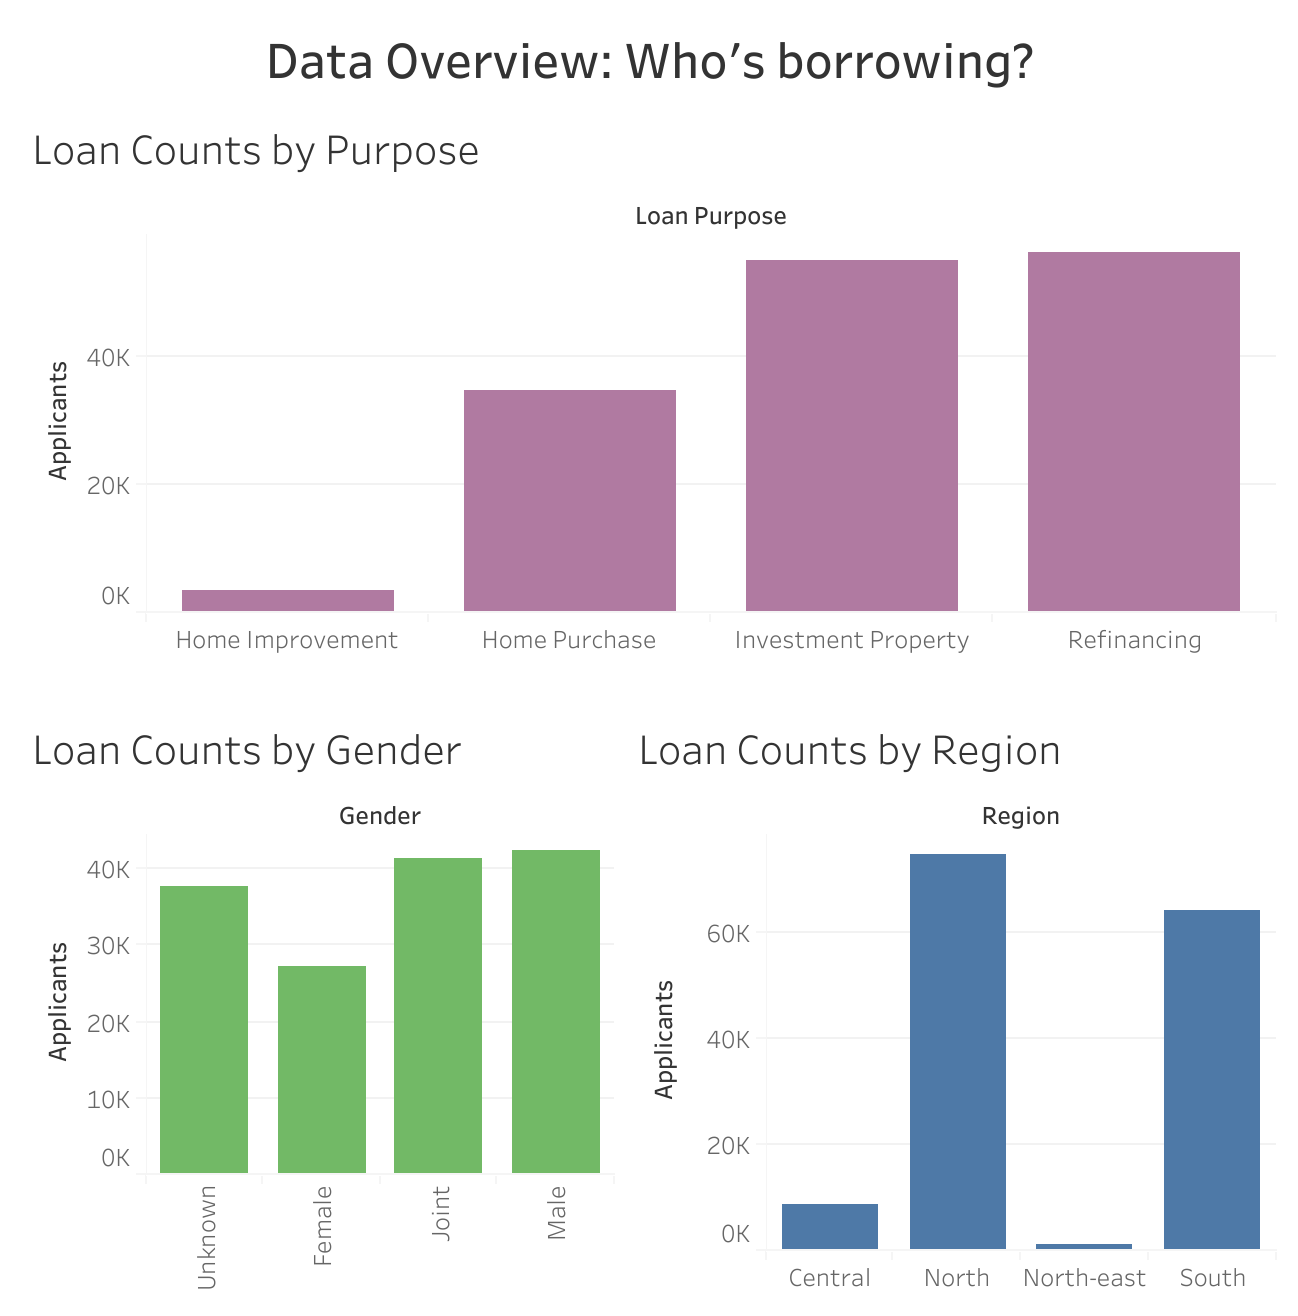

In [121]:
from IPython.display import Image
Image('Data Overview.png')

NOTES: This dashboard presents the distribution of loan applicants across three key dimensions: loan purpose, gender, and region.

Loan Counts by Purpose: The most common loan applications are for Refinancing and Investment Property, each attracting over 50,000 applicants. In contrast, Home Improvement loans are the least common.
  
Loan Counts by Gender: Joint and Male applicants represent the highest counts, with just over 40,000 each. Notably, a large number of applications (≈38,000) are tagged as Unknown, which may limit the usefulness of gender-based insights.

Loan Counts by Region: The North and South regions dominate with approximately 75,000 and 64,000 applicants, respectively. In comparison, the Central and especially North-East regions have significantly fewer applications.


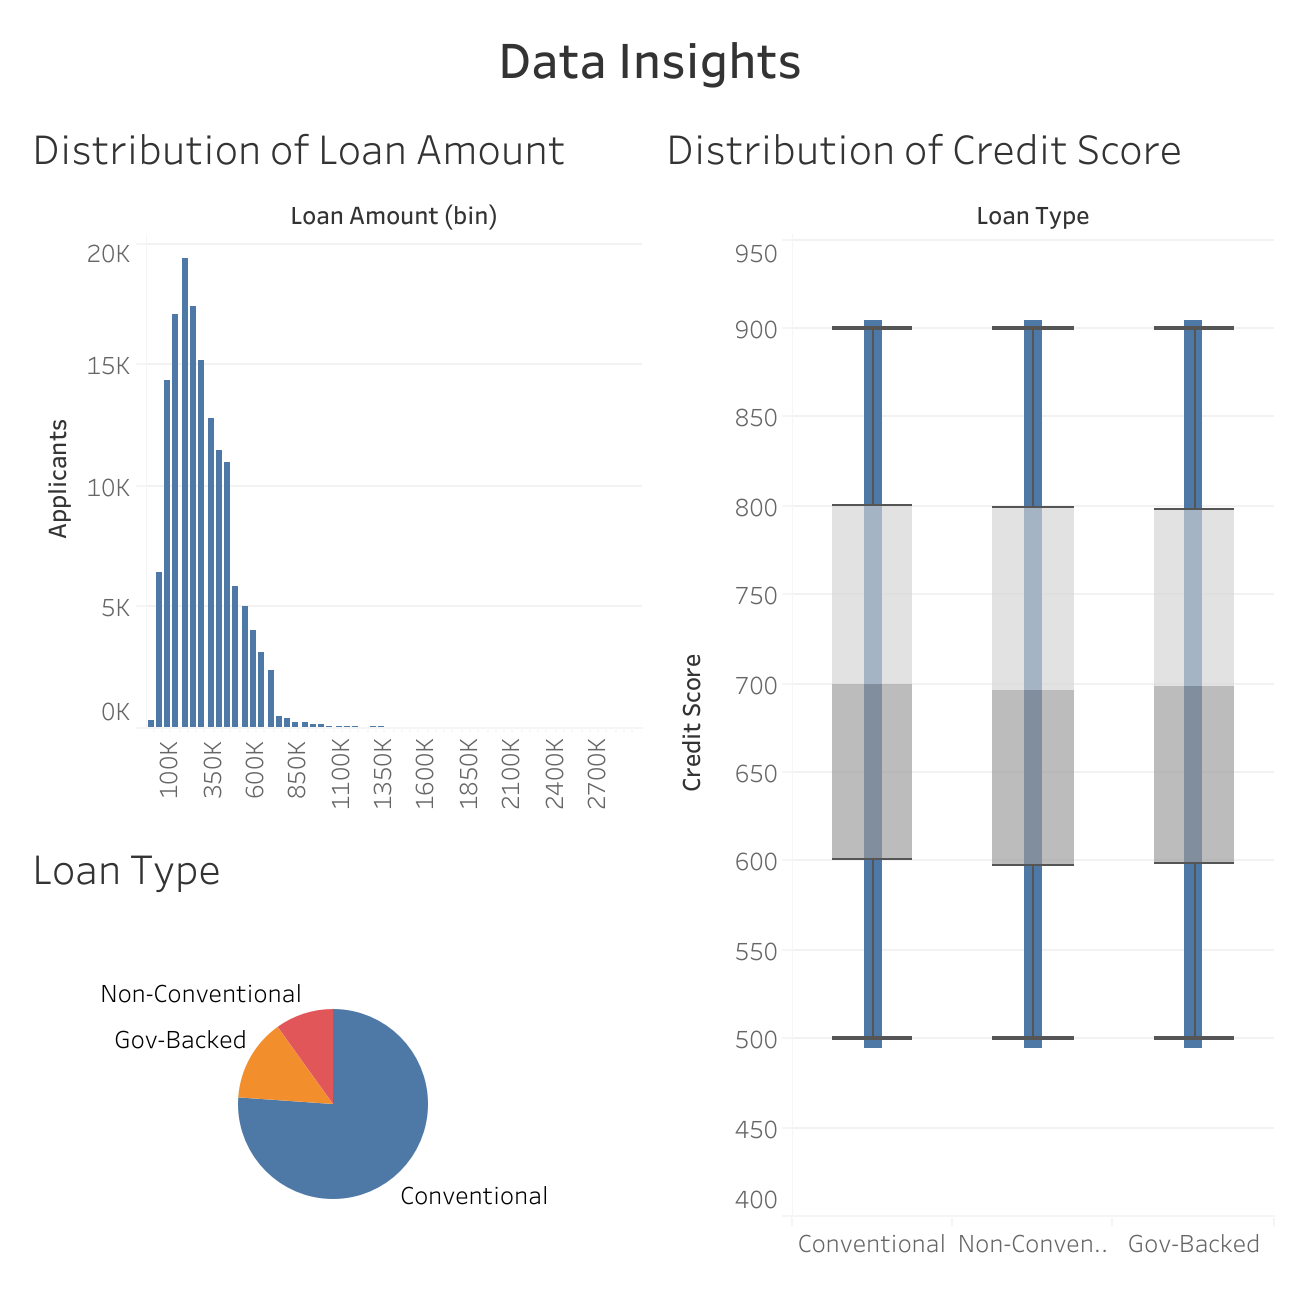

In [123]:
Image('Loan Characteristics.png')

NOTES: This dashboard explores the distribution of loan types, borrower credit scores, and loan amounts to uncover key patterns in the data.

Distribution of Loan Amount: The largest share of loan applications falls within the $150K–$250K range, indicating a common loan size preference among applicants.

Loan Type:
  - Conventional loans make up the majority at 76.1%
  - Government-backed loans account for 14.0%
  - Non-Conventional loans make up the remaining 9.9%

Distribution of Credit Score by Loan Type: Credit score distributions appear consistent across all loan types, suggesting borrower credit profiles are similar regardless of loan category. This may imply that loan type selection is influenced more by external criteria (such as loan programs or use cases) than by credit risk alone.

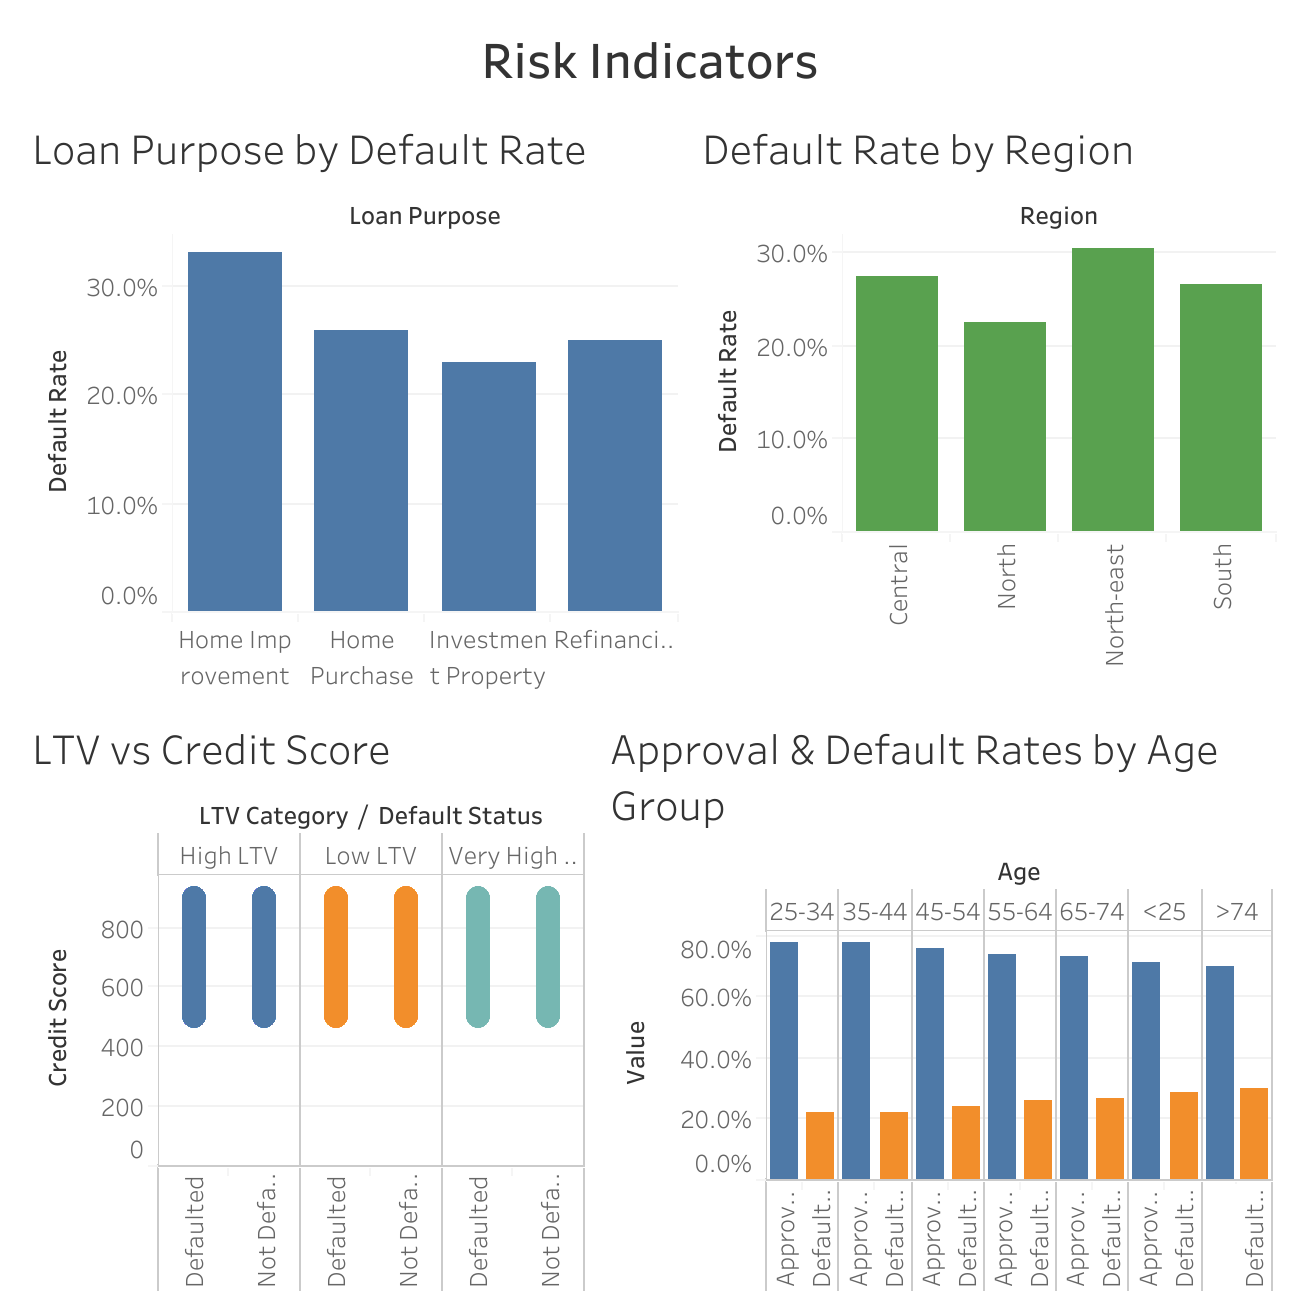

In [125]:
Image('Risk Indicators.png')

NOTES: This dashboard explores key loan risk drivers, focusing on default trends by loan purpose, region, and demographic groups. It also evaluates the relationship between LTV ratios and credit scores, as well as approval patterns by age group.

Loan Purpose by Default: Home Improvement loans have the highest default rate, followed by Refinancing and Home Purchase loans. This suggests certain loan intents may carry more risk.

Default Rate by Region: The North-East region shows the highest default rate, followed by the Central region. Regional economic conditions may influence this concentration of risk.

LTV vs. Credit Scores: Credit scores remain similar between default and non-default groups within each LTV category, suggesting that LTV may be a more critical predictor of default risk than credit score alone.

Approval & Default Rates by Age Group:** Borrowers aged 25–54 have the highest approval rates. However, **default rates increase notably after age 55, indicating increased credit risk in older borrower segments.


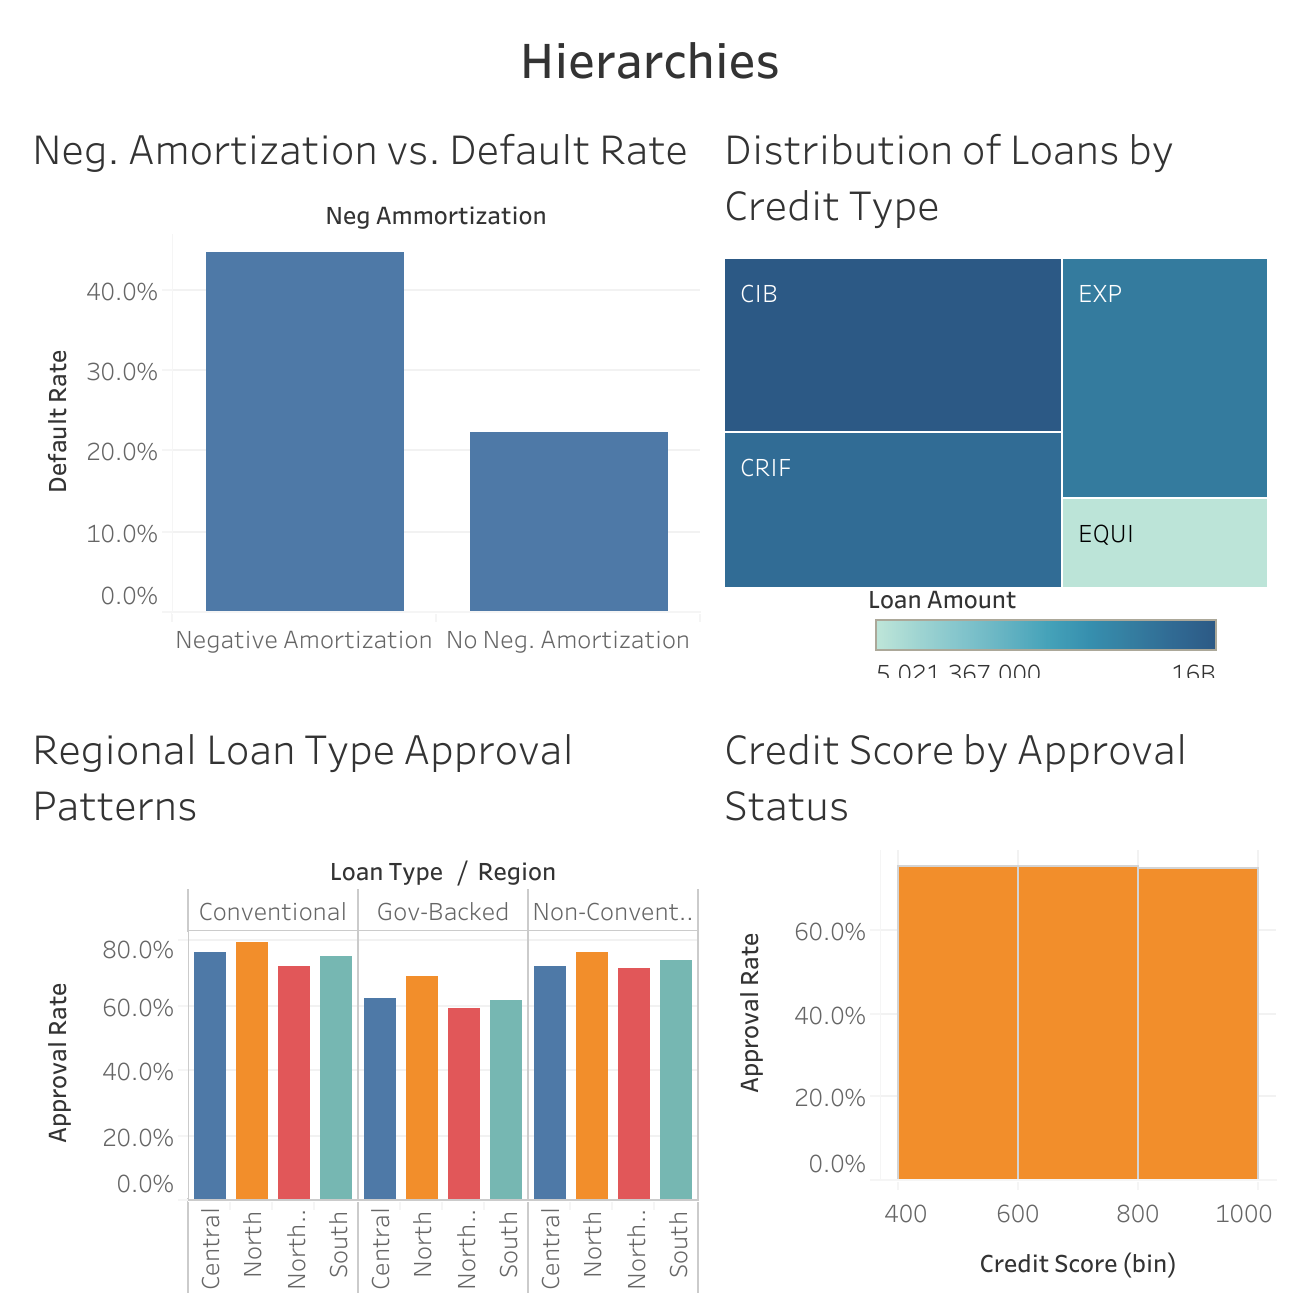

In [127]:
Image('Hierarchies.png')

NOTES: This dashboard dives deeper into loan approval patterns and categorical breakdowns. It includes default behavior by product features, explores approval likelihood across regions and credit scores, and offers views for hierarchical and demographic filtering.

Amortization & Default Risk: Applicants with negative amortization loans default at nearly double the rate of those without, highlighting a strong risk indicator.

Distribution of Loans by Credit Type: CIB and CRIF credit types account for the highest loan volumes, which may suggest they are preferred by lenders or tied to specific loan programs.

Regional Approval by Loan Type: The North region has the highest approval rates across most loan types. Conventional loans** consistently show higher approval rates, while Gov-Backed loans have slightly lower rates.

Credit Score & Approval Rate:** Approval rates are nearly identical across all credit score bins, suggesting credit score may not be a strong standalone predictor of approval outcomes in this dataset.

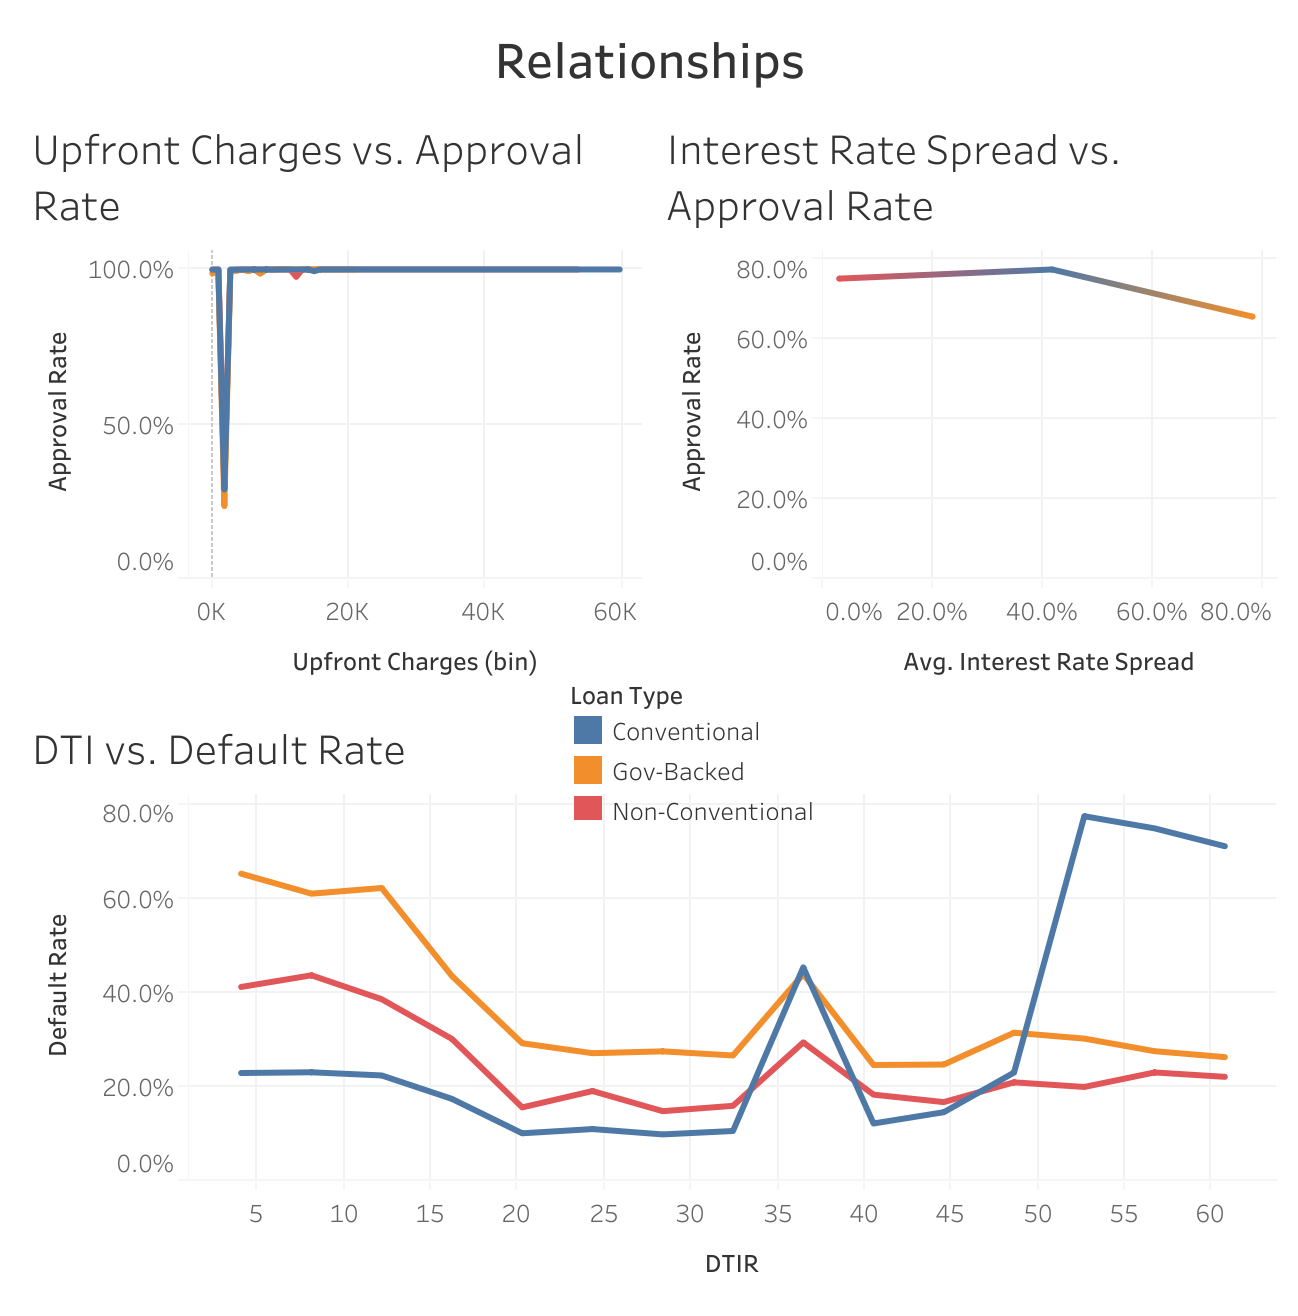

In [129]:
Image('Relationships.png')

NOTES: This dashboard explores key relationships between financial indicators and loan outcomes.

Upfront Charges vs. Approval: Most loans involve upfront charges under 20K, with a generally high approval rate across the board. A small dip in approval around the 2K bin may warrant further review, but overall, upfront charges do not appear to be a strong predictor of approval likelihood.

Int. Rate Spread vs. Approval: Approval rates decline as interest rate spread increases, indicating a negative relationship. Conventional loans generally maintain higher approval rates than others, especially at lower spreads.

DTIR vs. Default Rate: Higher DTIR values correspond with rising default rates, particularly for conventional loans. A notable spike in defaults occurs when DTIR exceeds 50. Gov-backed loans maintain relatively stable default rates across bins.


In [131]:
from scipy.stats import pearsonr

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='pearson')

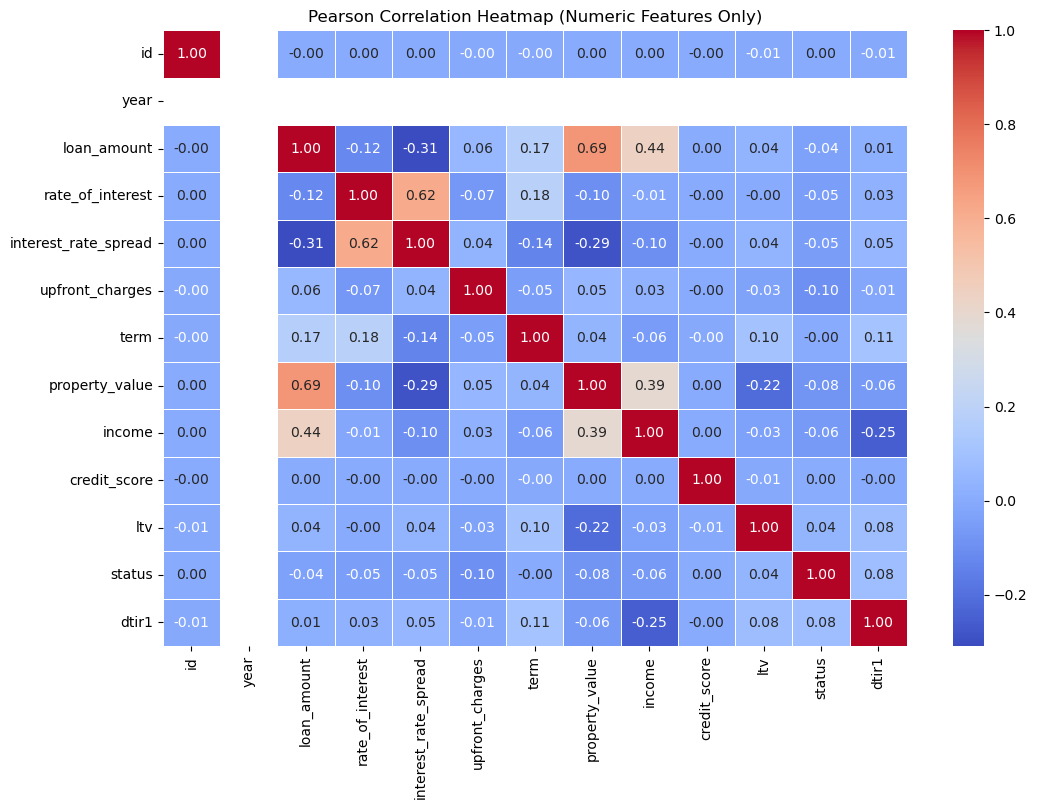

In [132]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Pearson Correlation Heatmap (Numeric Features Only)")
plt.show()

NOTES: There is a weak linear correlation between the numerical features and the target variable (Status). Since Status is categorical, Pearson correlation may not fully capture the relationship. Additionally, Pearson only measures linear relationships. Therefore, tree-based models may be more effective, because they can capture nonlinear patterns and interactions through decision-based logic.

In [139]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target
X = numerical_df
y = df['status']  

# Apply F-test
selector = SelectKBest(score_func=f_classif, k='all')  # or choose top k
selector.fit(X, y)

# Summary
f_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': selector.scores_,
    'p-Value': selector.pvalues_
}).sort_values(by='F-Score', ascending=False)

print(f_scores)

                 Feature      F-Score        p-Value
11                status          inf   0.000000e+00
5        upfront_charges  1356.639214  1.210288e-295
12                 dtir1  1017.125659  1.929235e-222
7         property_value   979.534921  2.522136e-214
8                 income   548.304344  4.882970e-121
4   interest_rate_spread   365.694332   2.031071e-81
3       rate_of_interest   325.461313   1.119591e-72
10                   ltv   270.997568   7.788582e-61
2            loan_amount   201.882585   8.690628e-46
9           credit_score     2.383121   1.226544e-01
0                     id     0.431231   5.113864e-01
6                   term     0.006385   9.363109e-01
1                   year          NaN            NaN


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 1 11] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


NOTES: The F-test evaluates whether the mean values of each numeric feature differ significantly between the two groups in the target variable (status). 

Several features have extremely high F-scores with near-zero p-values, indicating a strong and statistically significant difference between groups:upfront_charges, dtir1, property_value, income, interest_rate_spread, and rate_of_interest are the most predictive features.

Features like credit_score have a low F-score and high p-value (~0.12), suggesting weak or no significant relationship with default status.

Variables like id, term and year show no statistical significance and could be considered noise for modeling.
